In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [114]:
df = pd.read_csv("train.csv")
df = df[["LotArea", "SalePrice", "BedroomAbvGr", "FullBath", "HalfBath"]]
df.rename(columns={"BedroomAbvGr": "Bedrooms"}, inplace=True)

df.tail()

,LotArea,SalePrice,Bedrooms,FullBath,HalfBath
1455,7917,175000,3,2,1
1456,13175,210000,3,2,0
1457,9042,266500,4,2,0
1458,9717,142125,2,1,0
1459,9937,147500,3,1,1


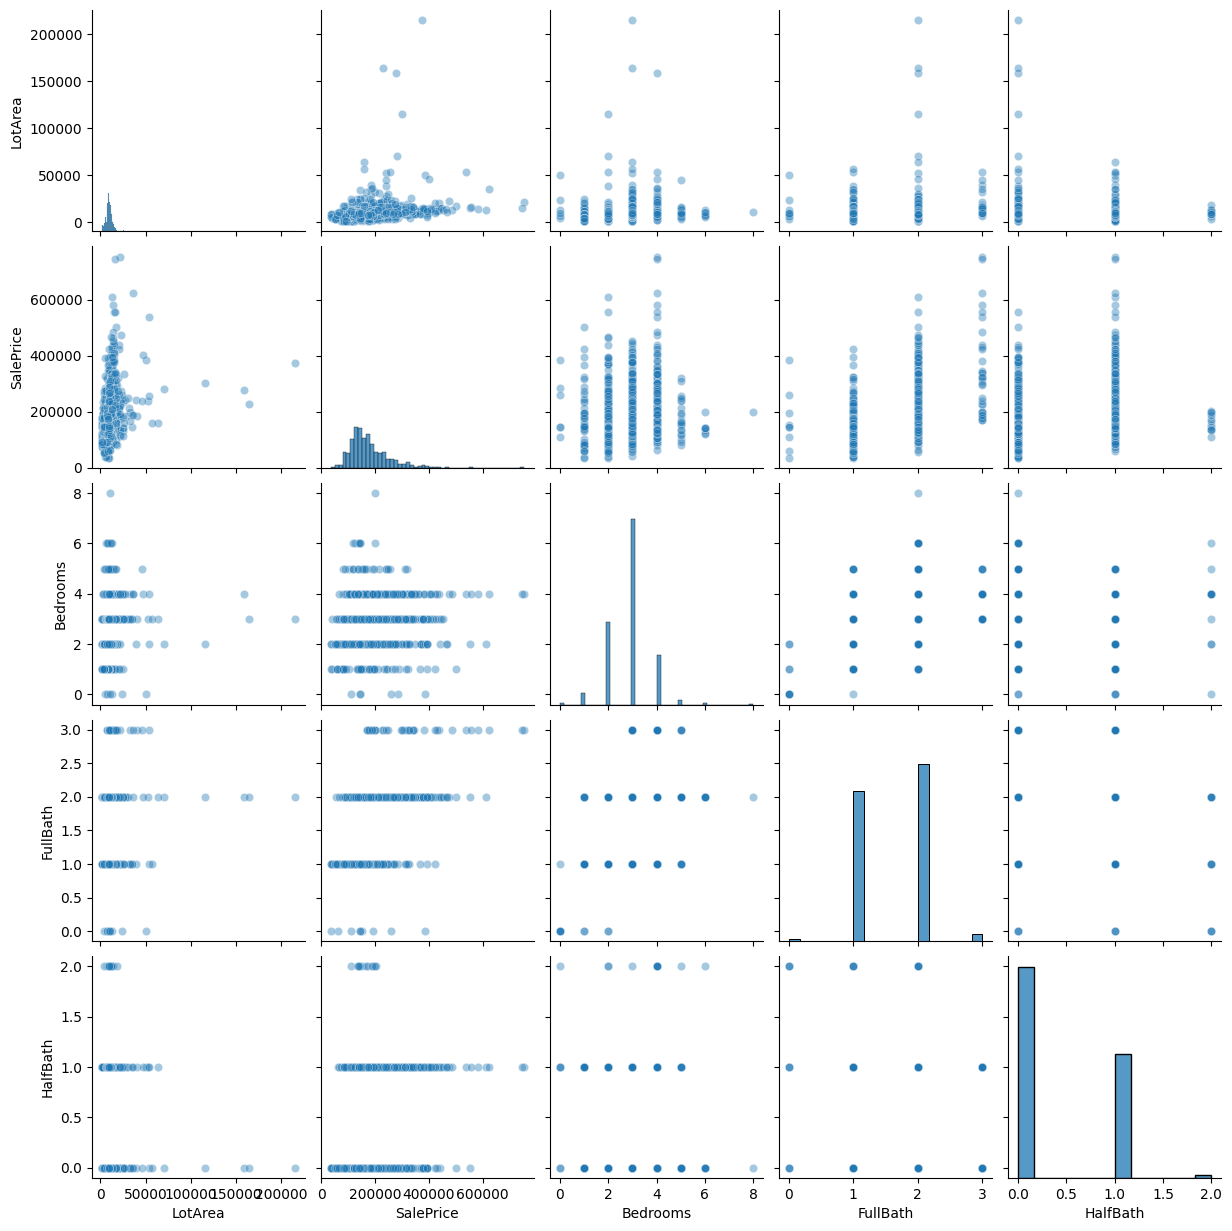

In [120]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha': 0.4})

In [115]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

      LotArea  Bedrooms  FullBath  HalfBath
0        8450         3         2         1
1        9600         3         2         0
2       11250         3         2         1
3        9550         3         1         0
4       14260         4         2         1
...       ...       ...       ...       ...
1455     7917         3         2         1
1456    13175         3         2         0
1457     9042         4         2         0
1458     9717         2         1         0
1459     9937         3         1         1

[1460 rows x 4 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [116]:
model = Pipeline(steps=[
    ('preprocessor', StandardScaler()),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('regressor', LinearRegression())])

In [117]:
y_predict = model.predict(X_test)

In [118]:
print("Mean squared error : ", mean_squared_error(y_test, y_predict))
print("Mean absolute error : ", mean_absolute_error(y_test, y_predict))

Mean squared error :  10288876729.82699
Mean absolute error :  41927.470470675595


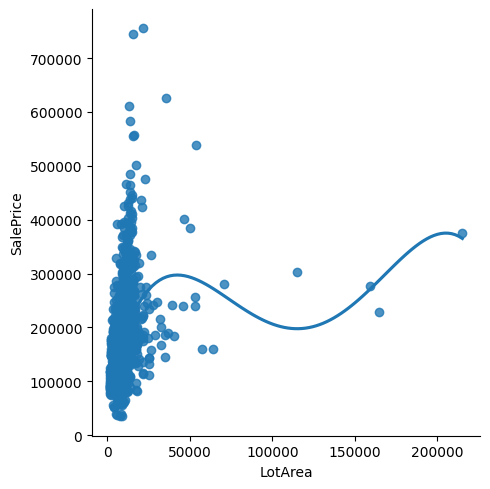

In [119]:
sns.lmplot(x ='LotArea', y ='SalePrice', data = df, order=4, ci = None)
plt.show()